<a href="https://colab.research.google.com/github/anthonivs/N1-ci-ncia-de-dados-/blob/main/Prova_Data_Science_N1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prova Data Science N1

## <font color='red'>Importante: a prova é individual.</font>

**Instruções:**

1. Faça download deste notebook e carregue o mesmo na sua conta do Google Colab.
2. Responda às questões propostas.
3. Crie um repositório para o notebook, "commite" o notebook neste repositório.
4. Na tarefa de avaliação do Teams, envie o link do repositório. Arquivos enviados diretamente no Teams não serão considerados.
5. Commits no repositório após a data de entrega (combinada em sala de aula) serão desconsiderados.

# Objeto da avaliação

Você irá fazer o download do arquivo de dados matches.csv do [repositório do Github](https://raw.githubusercontent.com/mdietterle/repositorio_dados/main/matches.csv)

Todas as questões/atividades serão realizadas com base neste arquivo. É importante que você responda aos questionamentos propostos o mais completo possível, com a maior quantidade de detalhes que você conseguir incluir.

Não se contente com o básico, seja criativo nas respostas, indo além do tradicional.

## **Importante!!**

Antes de começar a responder, abra o arquivo de dados e entenda o dataset. Não será fornecido um dicionário de dados, é sua tarefa analisar o dataset e "inferir" o que são as colunas e a sua organização.

## Instalação de bibliotecas necessárias

Instale neste local todas as bibliotecas necessárias para resolução da avaliação.

In [ ]:
# Instalação de bibliotecas básicas
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install plotly

## Estatísticas básicas do dataset


Carregue o arquivo de dados no notebook e exiba as características básicas do arquivo (shape, tipo de dados, dados ausentes, estatísticas básicas dos dados, etc)

In [21]:
# Responda aqui a primeira etapa
import pandas as pd
df = pd.read_csv('/content/Drivecolab/matches.csv')

Mounted at /content/Drive


In [34]:
# Carregar dataset
df = pd.read_csv('/content/Drivecolab/matches.csv')
# shape
print("\nFormato do dataset (linhas, colunas):")
print(df.shape)

# tipo de dados
print("\nTipos de dados das colunas:")
print(df.dtypes)

# dados ausentes
print("\nDados ausentes por coluna:")
print(df.isnull().sum())

# estatísticas básicas dos dados
print("\nInformações gerais sobre o dataframe:")
print(df.info())


Formato do dataset (linhas, colunas):
(1389, 28)

Tipos de dados das colunas:
Unnamed: 0        int64
date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk              float64
pkatt           float64
season            int64
team             object
dtype: object

Dados ausentes por coluna:
Unnamed: 0         0
date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                

## Dia da semana com placares mais altos

Crie um gráfico que responda em qual dia da semana os placares foram mais altos. O conceito de "placar mais alto" é a soma dos gols feitos no jogo.

Como a quantidade de jogos não é a mesma em todos os dias da semana (finais de semana tendem a ter mais jogos que em dias da semana - o que resultaria em placares mais altos nestes dias), você deverá encontrar uma forma de equalizar esta diferença na quantidade de jogos.

A resposta deverá ser um gráfico que demonstre claramente o comparativo dos dias.

<ipython-input-42-0ec71f2b65da>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='total_goals', data=goals_by_day, palette=custom_colors)


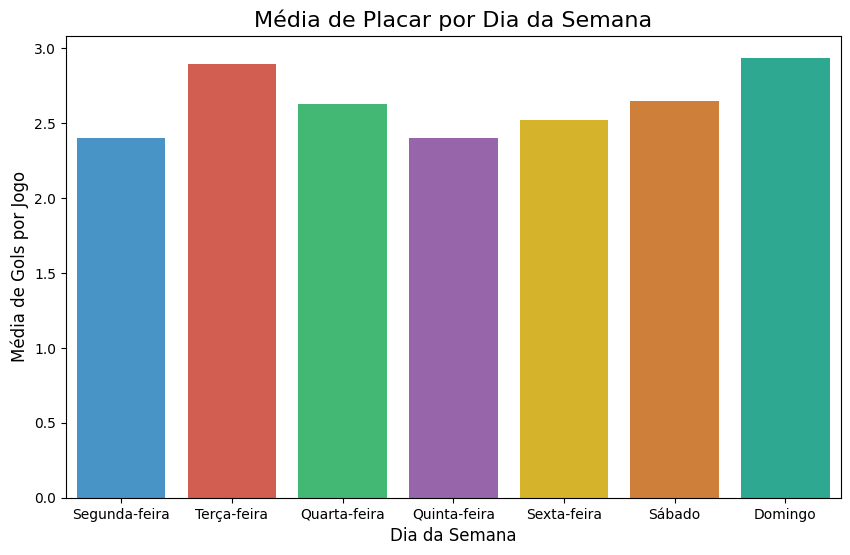

In [42]:
# Importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv('/content/Drivecolab/matches.csv')

# Criar uma nova coluna com a soma dos gols (placar do jogo)
df['total_goals'] = df['gf'] + df['ga']

# Agrupar por dia da semana ('day') e calcular a média de gols por jogo
goals_by_day = df.groupby('day')['total_goals'].mean().reset_index()

# Mapear os dias da semana para português
day_translation = {
    'Mon': 'Segunda-feira',
    'Tue': 'Terça-feira',
    'Wed': 'Quarta-feira',
    'Thu': 'Quinta-feira',
    'Fri': 'Sexta-feira',
    'Sat': 'Sábado',
    'Sun': 'Domingo'
}
goals_by_day['day'] = goals_by_day['day'].map(day_translation)

# Ordenar os dias da semana
order_pt = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo']
goals_by_day['day'] = pd.Categorical(goals_by_day['day'], categories=order_pt, ordered=True)
goals_by_day = goals_by_day.sort_values('day')

# Definir uma lista de cores personalizadas
custom_colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6', '#f1c40f', '#e67e22', '#1abc9c']

# Gerar o gráfico de barras com Seaborn usando a paleta personalizada
plt.figure(figsize=(10,6))
sns.barplot(x='day', y='total_goals', data=goals_by_day, palette=custom_colors)

# Adicionar título e rótulos
plt.title('Média de Placar por Dia da Semana', fontsize=16)
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Média de Gols por Jogo', fontsize=12)

# Exibir o gráfico
plt.show()


## Capitães

Quantos capitães diferentes cada equipe teve durante a temporada?

Responda em forma de um gráfico comparativo, apresentando os dados o mais claramente possível.

<ipython-input-43-f27435d1540a>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Equipe', y='Capitães Diferentes', data=captains_per_team, palette=custom_colors)
<ipython-input-43-f27435d1540a>:23: UserWarning: 
The palette list has fewer values (7) than needed (23) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Equipe', y='Capitães Diferentes', data=captains_per_team, palette=custom_colors)


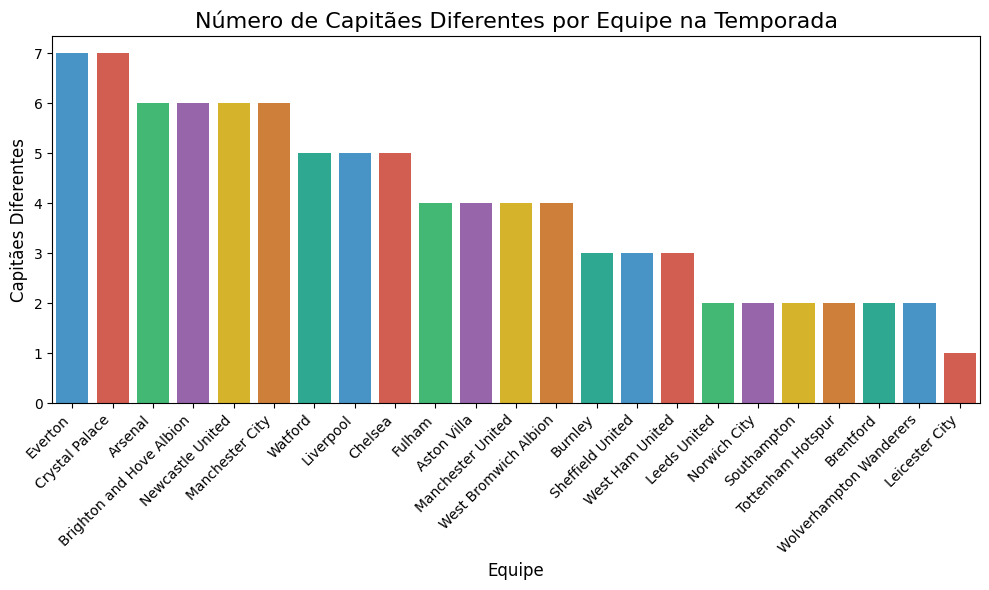

In [43]:
# Importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv('/content/Drivecolab/matches.csv')

# Contar o número de capitães únicos para cada equipe
captains_per_team = df.groupby('team')['captain'].nunique().reset_index()

# Renomear as colunas para facilitar a leitura
captains_per_team.columns = ['Equipe', 'Capitães Diferentes']

# Ordenar os dados para melhor visualização no gráfico
captains_per_team = captains_per_team.sort_values(by='Capitães Diferentes', ascending=False)

# Definir uma lista de cores personalizadas
custom_colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6', '#f1c40f', '#e67e22', '#1abc9c']

# Gerar o gráfico de barras com Seaborn usando a paleta personalizada
plt.figure(figsize=(10,6))
sns.barplot(x='Equipe', y='Capitães Diferentes', data=captains_per_team, palette=custom_colors)

# Adicionar título e rótulos em português
plt.title('Número de Capitães Diferentes por Equipe na Temporada', fontsize=16)
plt.xlabel('Equipe', fontsize=12)
plt.ylabel('Capitães Diferentes', fontsize=12)

# Rotacionar os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45, ha='right')

# Exibir o gráfico
plt.tight_layout()
plt.show()


## Formação Tática

Qual a formação tática mais comum para cada equipe de acordo com o resultado obtido (Ex: para vitórias, a formação mais comum é X, para empates Y e para Z em derrotas).

**Importante** responda de forma que seja possível fazer comparativos entre equipes.

Responda com um gráfico.

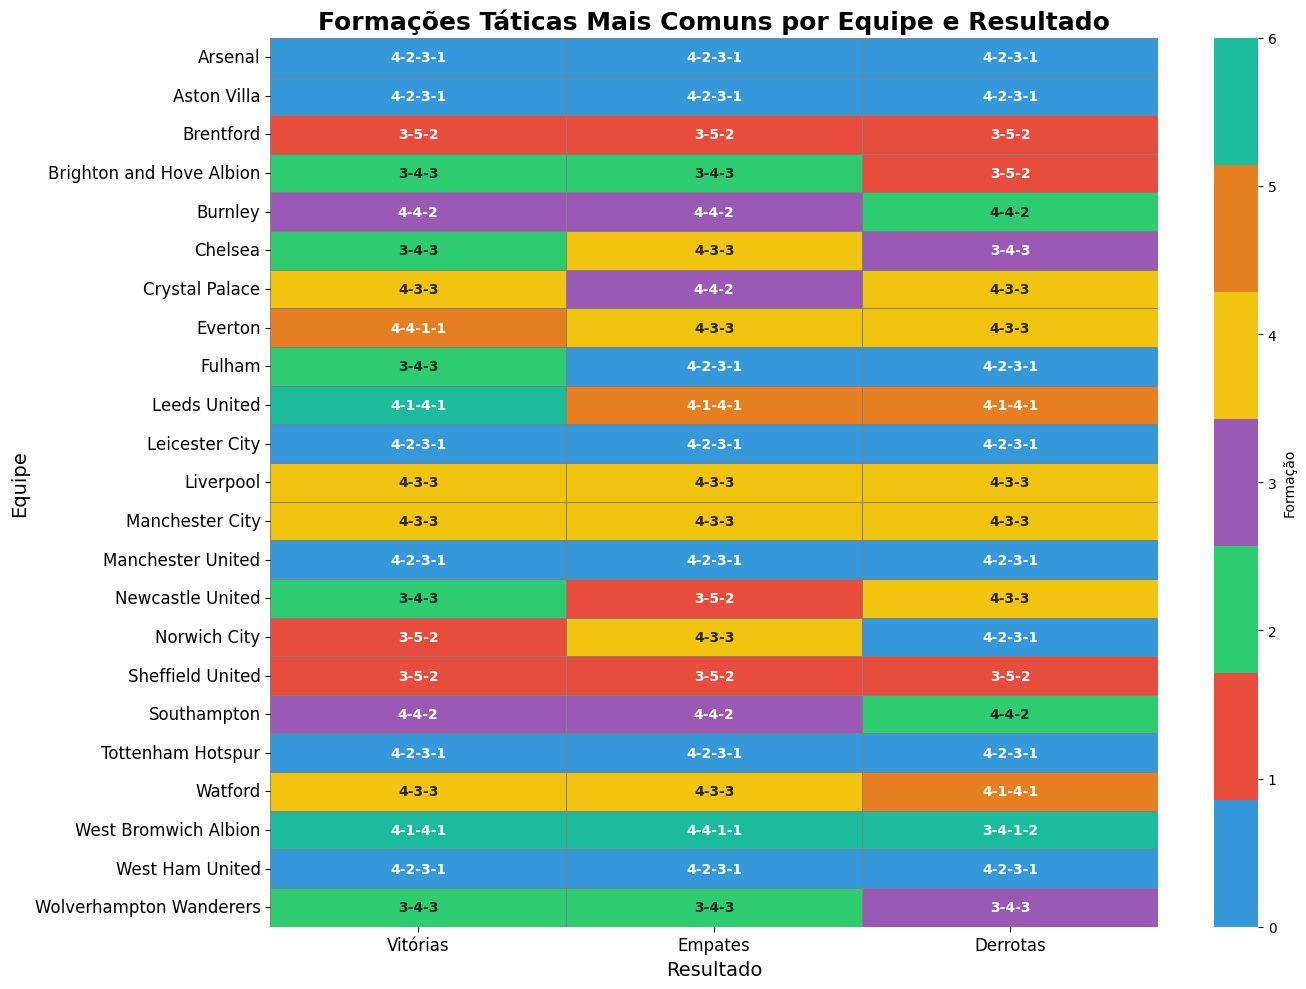

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset
df = pd.read_csv('/content/Drivecolab/matches.csv')

# Filtrar dados para vitórias, empates e derrotas
results = ['W', 'D', 'L']
formation_data = []

# Iterar sobre cada equipe e resultado para encontrar a formação mais comum
for result in results:
    common_formation = df[df['result'] == result].groupby(['team', 'formation']).size().reset_index(name='count')
    common_formation = common_formation.sort_values(['team', 'count'], ascending=[True, False]).drop_duplicates(['team'])
    common_formation['result'] = result
    formation_data.append(common_formation)

# Concatenar os dados das formações mais comuns
formation_data = pd.concat(formation_data)

# Pivotar os dados para facilitar o gráfico
formation_pivot = formation_data.pivot(index='team', columns='result', values='formation')

# Definir uma lista de cores personalizadas
custom_colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6', '#f1c40f', '#e67e22', '#1abc9c']

# Configurar o heatmap
plt.figure(figsize=(14, 10))

# Criar o heatmap
heatmap = sns.heatmap(
    formation_pivot.apply(lambda x: pd.factorize(x)[0]),
    annot=formation_pivot,
    fmt='',
    cmap=sns.color_palette(custom_colors, as_cmap=True),
    cbar=True,
    cbar_kws={'label': 'Formação'},
    linewidths=0.5,
    linecolor='gray',
    annot_kws={'size': 10, 'weight': 'bold'}
)

# Melhorar a aparência do gráfico
plt.title('Formações Táticas Mais Comuns por Equipe e Resultado', fontsize=18, weight='bold')
plt.xlabel('Resultado', fontsize=14)
plt.ylabel('Equipe', fontsize=14)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['Vitórias', 'Empates', 'Derrotas'], fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Exibir o gráfico
plt.show()


## Posse de bola

Qual a média de posse de bola da equipe mandante quando ela perdeu o jogo?

Responda em forma de gráfico para poder comparar entre todas as equipes.

<ipython-input-49-53f23d22f77b>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Equipe', y='Média de Posse de Bola', data=average_possession, palette=custom_colors)


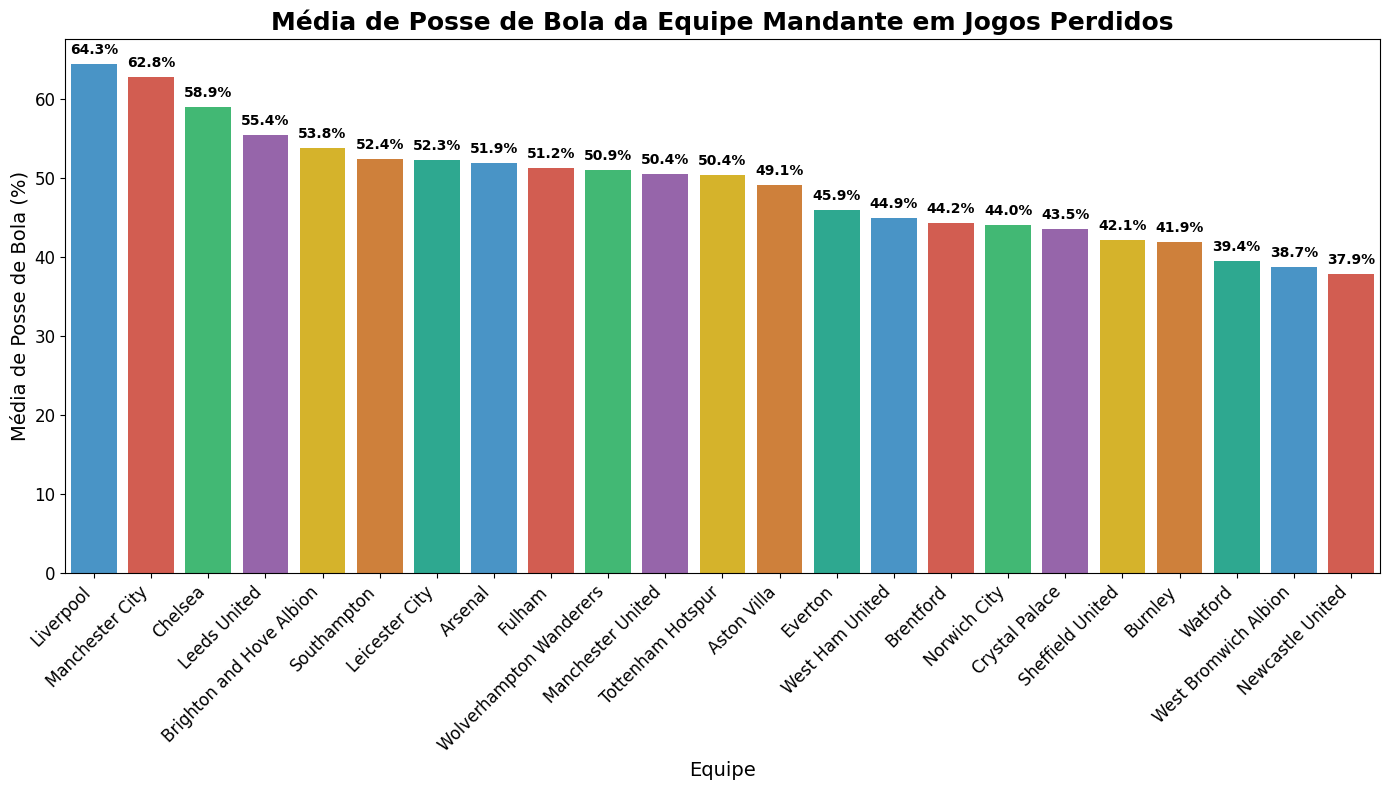

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset
df = pd.read_csv('/content/Drivecolab/matches.csv')

# Filtrar dados para partidas em que a equipe mandante perdeu
df_lost = df[df['result'] == 'L']

# Calcular a média de posse de bola da equipe mandante nessas partidas
average_possession = df_lost.groupby('team')['poss'].mean().reset_index()

# Renomear as colunas para facilitar a leitura
average_possession.columns = ['Equipe', 'Média de Posse de Bola']

# Ordenar os dados para melhor visualização no gráfico
average_possession = average_possession.sort_values(by='Média de Posse de Bola', ascending=False)

# Definir uma lista de cores personalizadas
custom_colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6', '#f1c40f', '#e67e22', '#1abc9c']

# Garantir que o número de cores seja suficiente para o número de equipes
num_teams = len(average_possession)
if num_teams > len(custom_colors):
    custom_colors *= (num_teams // len(custom_colors)) + 1
custom_colors = custom_colors[:num_teams]

# Configurar o gráfico
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Equipe', y='Média de Posse de Bola', data=average_possession, palette=custom_colors)

# Adicionar anotações
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=10, weight='bold')

# Adicionar título e rótulos
plt.title('Média de Posse de Bola da Equipe Mandante em Jogos Perdidos', fontsize=18, weight='bold')
plt.xlabel('Equipe', fontsize=14)
plt.ylabel('Média de Posse de Bola (%)', fontsize=14)

# Rotacionar os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Melhorar a aparência do gráfico
plt.tight_layout()

# Exibir o gráfico
plt.show()


<ipython-input-54-b191a0774d9e>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_home = sns.barplot(x='Equipe', y='Média de Posse de Bola Mandante', data=average_possession_home, palette=custom_colors, alpha=0.6)
<ipython-input-54-b191a0774d9e>:41: UserWarning: 
The palette list has fewer values (7) than needed (23) and will cycle, which may produce an uninterpretable plot.
  ax_home = sns.barplot(x='Equipe', y='Média de Posse de Bola Mandante', data=average_possession_home, palette=custom_colors, alpha=0.6)


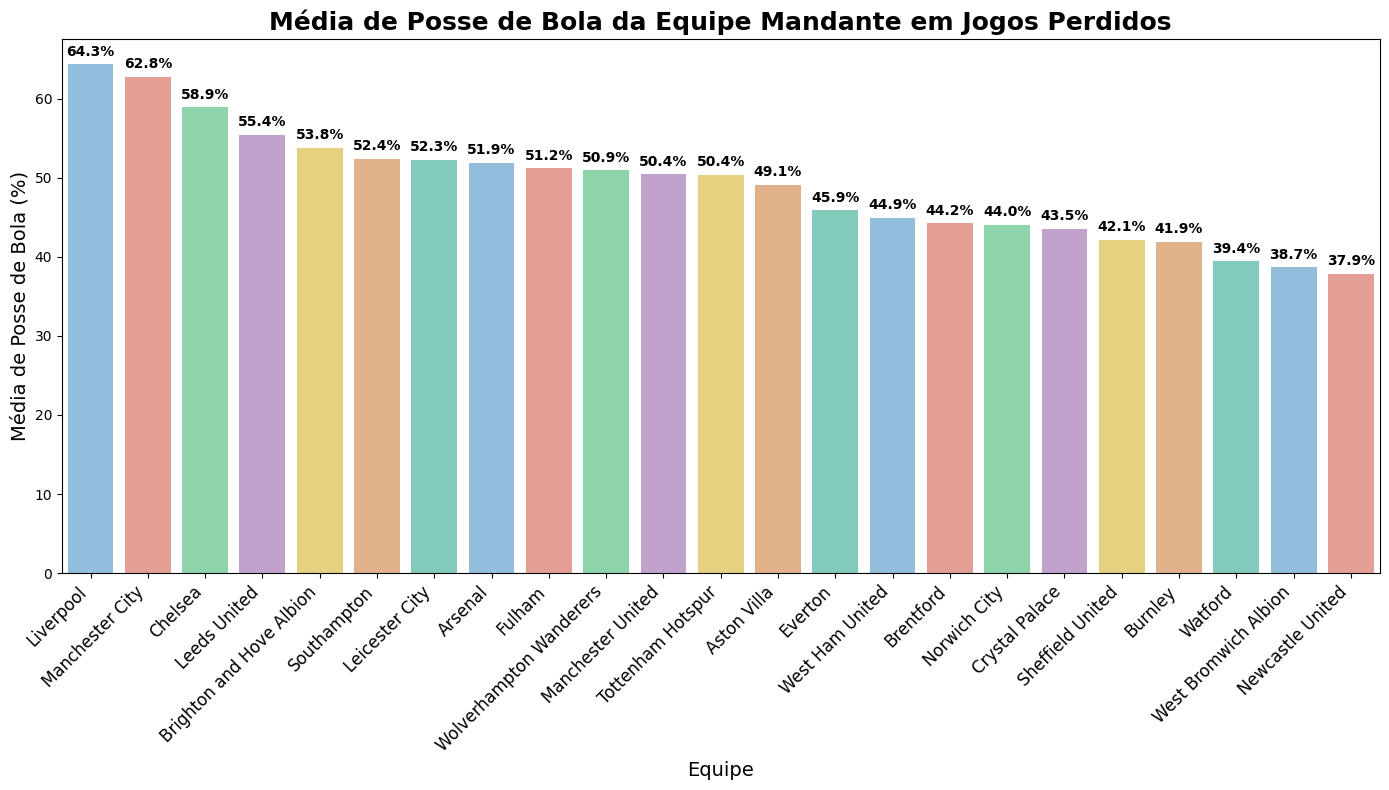

<ipython-input-54-b191a0774d9e>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_away = sns.barplot(x='Equipe', y='Média de Posse de Bola Visitante', data=average_possession_away, palette=custom_colors, alpha=0.6)
<ipython-input-54-b191a0774d9e>:52: UserWarning: 
The palette list has fewer values (7) than needed (23) and will cycle, which may produce an uninterpretable plot.
  ax_away = sns.barplot(x='Equipe', y='Média de Posse de Bola Visitante', data=average_possession_away, palette=custom_colors, alpha=0.6)


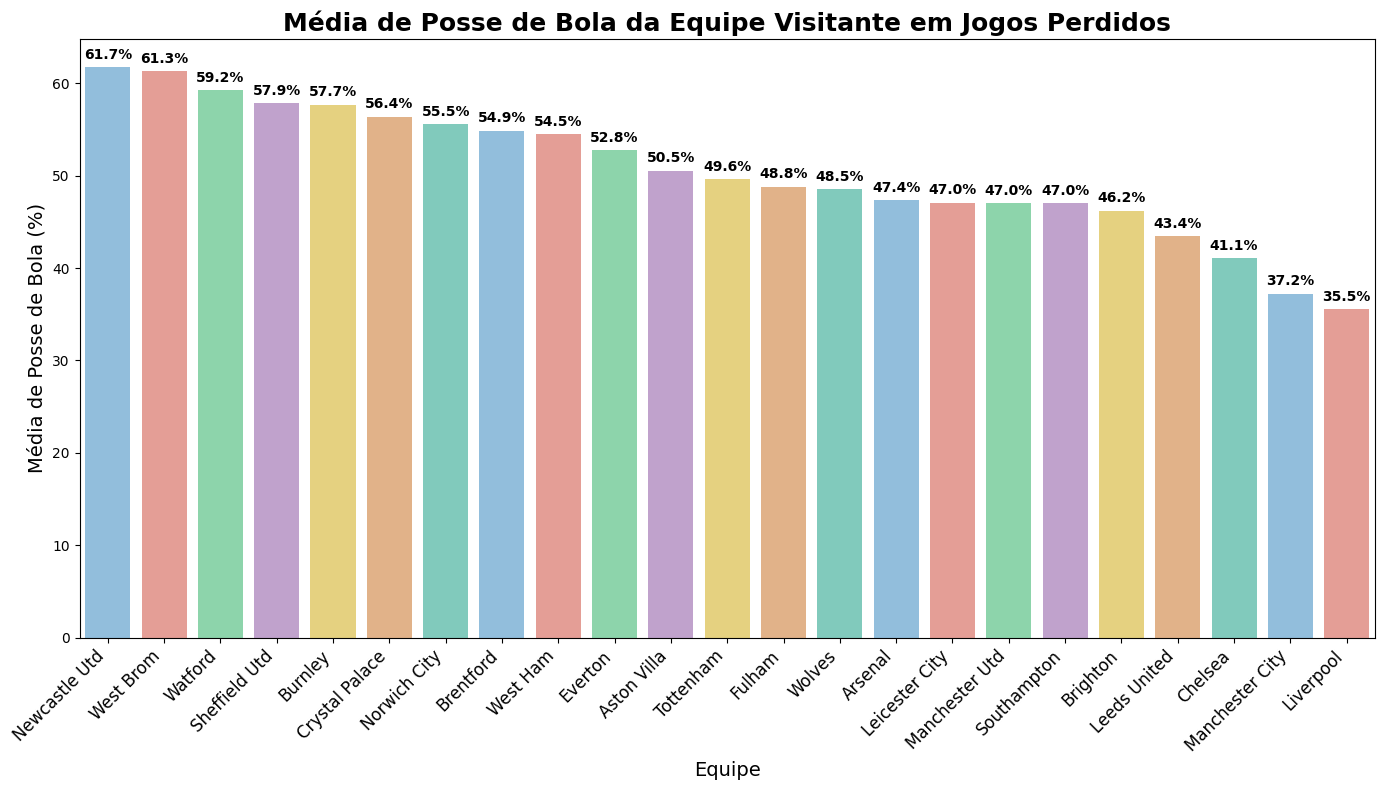

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset
df = pd.read_csv('/content/Drivecolab/matches.csv')

# Filtrar dados para partidas em que a equipe mandante perdeu
df_lost_home = df[df['result'] == 'L']

# Calcular a média de posse de bola da equipe mandante nessas partidas
average_possession_home = df_lost_home.groupby('team')['poss'].mean().reset_index()
average_possession_home.columns = ['Equipe', 'Média de Posse de Bola Mandante']

# Filtrar dados para partidas em que a equipe visitante perdeu
df_lost_away = df[df['result'] == 'W']

# Calcular a média de posse de bola da equipe visitante nessas partidas
average_possession_away = df_lost_away.groupby('opponent')['poss'].mean().reset_index()
average_possession_away.columns = ['Equipe', 'Média de Posse de Bola Visitante']

# Ordenar os dados para melhor visualização no gráfico
average_possession_home = average_possession_home.sort_values(by='Média de Posse de Bola Mandante', ascending=False)
average_possession_away = average_possession_away.sort_values(by='Média de Posse de Bola Visitante', ascending=False)

# Definir uma lista de cores personalizadas
custom_colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6', '#f1c40f', '#e67e22', '#1abc9c']

# Função para adicionar etiquetas de texto no gráfico
def add_labels(ax, data, column_name):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 9), textcoords='offset points',
                    fontsize=10, fontweight='bold', color='black')

# Configurar o gráfico para a posse de bola das equipes mandantes
plt.figure(figsize=(14, 8))
ax_home = sns.barplot(x='Equipe', y='Média de Posse de Bola Mandante', data=average_possession_home, palette=custom_colors, alpha=0.6)
add_labels(ax_home, average_possession_home, 'Média de Posse de Bola Mandante')
plt.title('Média de Posse de Bola da Equipe Mandante em Jogos Perdidos', fontsize=18, weight='bold')
plt.xlabel('Equipe', fontsize=14)
plt.ylabel('Média de Posse de Bola (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

# Configurar o gráfico para a posse de bola das equipes visitantes
plt.figure(figsize=(14, 8))
ax_away = sns.barplot(x='Equipe', y='Média de Posse de Bola Visitante', data=average_possession_away, palette=custom_colors, alpha=0.6)
add_labels(ax_away, average_possession_away, 'Média de Posse de Bola Visitante')
plt.title('Média de Posse de Bola da Equipe Visitante em Jogos Perdidos', fontsize=18, weight='bold')
plt.xlabel('Equipe', fontsize=14)
plt.ylabel('Média de Posse de Bola (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


## Classificação

Qual a classificação final do campeonato?

Responda em forma de tabela, ordenada do primeiro colocado ao último.
Você deverá apresentar o brasão do time (pode ser obtido online [aqui](https://logodetimes.com/premier-league/), mas automatize a busca, não salve o logo localmente), o nome, a quantidade de pontos e a posição final no campeonato.

**OBS** Vitória vale 3 pontos, empates 1 ponto e derrota 0 pontos.

In [60]:
import pandas as pd
from IPython.display import display, HTML

# Calcular pontos das equipes
df['points'] = df['result'].apply(lambda x: 3 if x == 'W' else 1 if x == 'D' else 0)

# Agrupar por equipe e calcular o total de pontos
team_points = df.groupby('team')['points'].sum().reset_index()

# Ordenar por pontos, do maior para o menor
team_points = team_points.sort_values(by='points', ascending=False).reset_index(drop=True)
team_points['position'] = team_points.index + 1  # Adicionar a posição do time

# Dicionário atualizado de URLs dos logos das equipes
logo_urls = {
    "Arsenal": "https://upload.wikimedia.org/wikipedia/en/5/53/Arsenal_FC.svg",
    "Aston Villa": "https://www.justwatch.com/images/icon/318618533/s166/aston-villa-fc.png",
    "Brentford": "https://upload.wikimedia.org/wikipedia/en/2/2a/Brentford_FC_crest.svg",
    "Brighton and Hove Albion": "https://th.bing.com/th/id/R.d45229b54cf1b796285e2c5e30e99cf6?rik=whWY6bvQwXc5cQ&pid=ImgRaw&r=0",
    "Burnley": "https://upload.wikimedia.org/wikipedia/en/thumb/6/6d/Burnley_FC_Logo.svg/300px-Burnley_FC_Logo.svg.png",
    "Chelsea": "https://upload.wikimedia.org/wikipedia/en/c/cc/Chelsea_FC.svg",
    "Crystal Palace": "https://th.bing.com/th/id/R.1d851a79bbf170f3e1b0ba55386adaf0?rik=t9U%2fcvTAUEOJ%2bw&pid=ImgRaw&r=0",
    "Everton": "https://upload.wikimedia.org/wikipedia/en/7/7c/Everton_FC_logo.svg",
    "Leeds United": "https://upload.wikimedia.org/wikipedia/en/5/54/Leeds_United_F.C._logo.svg",
    "Leicester City": "https://upload.wikimedia.org/wikipedia/en/2/2d/Leicester_City_crest.svg",
    "Liverpool": "https://upload.wikimedia.org/wikipedia/en/0/0c/Liverpool_FC.svg",
    "Manchester City": "https://upload.wikimedia.org/wikipedia/en/e/eb/Manchester_City_FC_badge.svg",
    "Manchester United": "https://upload.wikimedia.org/wikipedia/en/7/7a/Manchester_United_FC_crest.svg",
    "Newcastle United": "https://upload.wikimedia.org/wikipedia/en/5/56/Newcastle_United_Logo.svg",
    "Norwich City": "https://vectorseek.com/wp-content/uploads/2023/07/Norwich-City-Fc-Logo-Vector.jpg",
    "Southampton": "https://upload.wikimedia.org/wikipedia/en/c/c9/FC_Southampton.svg",
    "Tottenham Hotspur": "https://upload.wikimedia.org/wikipedia/en/b/b4/Tottenham_Hotspur.svg",
    "Watford": "https://upload.wikimedia.org/wikipedia/en/e/e2/Watford.svg",
    "West Ham United": "https://upload.wikimedia.org/wikipedia/en/c/c2/West_Ham_United_FC_logo.svg",
    "Wolverhampton Wanderers": "https://upload.wikimedia.org/wikipedia/en/f/fc/Wolverhampton_Wanderers.svg",
    "Sheffield United": "https://vectorseek.com/wp-content/uploads/2023/06/Fc-Sheffield-United-Logo-Vector.jpg",
    "Fulham": "https://upload.wikimedia.org/wikipedia/en/e/eb/Fulham_FC_%28shield%29.svg",
    "West Bromwich Albion": "https://upload.wikimedia.org/wikipedia/en/8/8b/West_Bromwich_Albion.svg"
}

# Mapear os times para os logos encontrados
team_points['logo_url'] = team_points['team'].map(lambda x: logo_urls.get(x, ''))

# Renomear as colunas para o português
team_points.rename(columns={
    'position': 'posição',
    'team': 'time',
    'points': 'pontos'
}, inplace=True)

# Função para exibir a tabela com as imagens dos logos
def display_table_with_logos(df):
    # Criar uma cópia do DataFrame para evitar o SettingWithCopyWarning
    df_copy = df.copy()
    df_copy['logo'] = df_copy['logo_url'].apply(lambda url: f'<img src="{url}" width="30"/>' if url else 'Logo não encontrado')
    # Exibir a tabela sem a coluna 'logo_url'
    html_table = df_copy[['posição', 'time', 'pontos', 'logo']].to_html(escape=False, formatters={'logo': lambda x: x})
    display(HTML(html_table))

# Exibir a tabela final com posição, nome do time, pontos e brasão, sem a coluna 'logo_url'
display_table_with_logos(team_points)


,posição,time,pontos,logo
0,1,Manchester City,166,
1,2,Chelsea,132,
2,3,Manchester United,128,
3,4,Arsenal,121,
4,5,Tottenham Hotspur,120,
5,6,West Ham United,117,
6,7,Leicester City,108,
7,8,Wolverhampton Wanderers,94,
8,9,Leeds United,93,
9,10,Aston Villa,92,


## Público

Crie uma visualização que apresente o público total de cada equipe, e também um detalhamento por jogos.

Apresentar os dados usando a técnica "DrillDown" será considerado um "plus". A visualização DrillDown permite que gráficos sejam detalhados com cliques em itens do gráfico.

Um exemplo com tabelas pode ser encontrado [aqui](https://dash.plotly.com/dash-ag-grid/enterprise-master-detail).

Um exemplo usando gráficos pode ser encontrado [aqui](https://community.plotly.com/t/show-and-tell-drill-down-functionality-in-dash-using-callback-context/54403?u=atharvakatre)